# Exploring Data with Python


In [ ]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

The data has been loaded into a Python **list** structure, which is a good data type for general data manipulation, but not optimized for numeric analysis. For that, we're going to use the **NumPy** package, which includes specific data types and functions for working with *Num*bers in *Py*thon.

Run the cell below to load the data into a NumPy **array**.

In [ ]:
!pip install numpy
import numpy as np

grades = np.array(data)
print(grades)

Just in case you're wondering about the differences between a **list** and a NumPy **array**, let's compare how these data types behave when we use them in an expression that multiplies them by 2.

In [ ]:
print (type(data),'x 2:', data * 2)
print('---')
print (type(grades),'x 2:', grades * 2)

In [ ]:
grades.shape

The shape confirms that this array has only one dimension, which contains 22 elements (there are 22 grades in the original list). You can access the individual elements in the array by their zero-based ordinal position. Let's get the first element (the one in position 0).

In [ ]:
grades[0]

In [ ]:
grades.mean()

In [ ]:
# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

Now the data consists of a 2-dimensional array - an array of arrays. Let's look at its shape.

In [ ]:
# Show shape of 2D array
student_data.shape

In [ ]:
# Show the first element of the first element
student_data[0][0]

In [ ]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

## Exploring tabular data with Pandas



In [ ]:
!pip install pandas
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students 

### Loading a DataFrame from a  file

We constructed the DataFrame from some existing arrays. However, in many real-world scenarios, data is loaded from sources such as files. Let's replace the student grades DataFrame with the contents of a text file.

In [ ]:
df_students = pd.read_csv('data/grades.csv',delimiter=',',header='infer')
df_students.head()

The DataFrame's **read_csv** method is used to load data from text files. As you can see in the example code, you can specify options such as the column delimiter and which row (if any) contains column headers (in this case, the delimiter is a comma and the first row contains the column names - these are the default settings, so the parameters could have been omitted).


### Handling missing values

One of the most common issues data scientists need to deal with is incomplete or missing data. So how would we know that the DataFrame contains missing values? You can use the **isnull** method to identify which individual values are null, like this:

In [ ]:
df_students.isnull()

Of course, with a larger DataFrame, it would be inefficient to review all of the rows and columns individually; so we can get the sum of missing values for each column, like this:

In [ ]:
df_students.isnull().sum()

So now we know that there's one missing **StudyHours** value, and two missing **Grade** values.

To see them in context, we can filter the dataframe to include only rows where any of the columns (axis 1 of the DataFrame) are null.

In [ ]:
df_students[df_students.isnull().any(axis=1)]

When the DataFrame is retrieved, the missing numeric values show up as **NaN** (*not a number*).

So now that we've found the null values, what can we do about them?

One common approach is to *impute* replacement values. For example, if the number of study hours is missing, we could just assume that the student studied for an average amount of time and replace the missing value with the mean study hours. To do this, we can use the **fillna** method, like this:

In [ ]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

Alternatively, it might be important to ensure that you only use data you know to be absolutely correct; so you can drop rows or columns that contains null values by using the **dropna** method. In this case, we'll remove rows (axis 0 of the DataFrame) where any of the columns contain null values.

In [ ]:
df_students = df_students.dropna(axis=0, how='any')
df_students

### Explore data in the DataFrame

Now that we've cleaned up the missing values, we're ready to explore the data in the DataFrame. Let's start by comparing the mean study hours and grades.

In [ ]:
# Get the mean study hours using the column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

OK, let's filter the DataFrame to find only the students who studied for more than the average amount of time.

In [ ]:
# Get students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the DataFrame, indicating whether or not each student passed.

First, we'll create a Pandas **Series** containing the pass/fail indicator (True or False), and then we'll concatenate that series as a new column (axis 1) in the DataFrame.

In [ ]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students

## Part 2 - Visualizing data with Matplotlib

DataFrames provide a great way to explore and analyze tabular data, but sometimes a picture is worth a thousand rows and columns. The **Matplotlib** library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

Let's start with a simple bar chart that shows the grade of each student.

In [ ]:
# Ensure plots are displayed inline in the notebook
!pip install matplotlib
!Pip install scipy
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Well, that worked; but the chart could use some improvements to make it clearer what we're looking at.

Note that you used the **pyplot** class from Matplotlib to plot the chart. This class provides a whole bunch of ways to improve the visual elements of the plot. For example, the following code:

- Specifies the color of the bar chart.
- Adds a title to the chart (so we know what it represents)
- Adds labels to the X and Y (so we know which axis shows which data)
- Adds a grid (to make it easier to determine the values for the bars)
- Rotates the X markers (so we can read them)

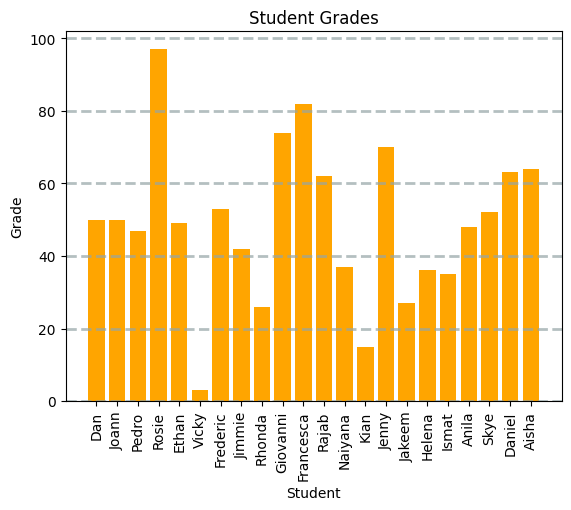

In [24]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

A plot is technically contained with a **Figure**. In the previous examples, the figure was created implicitly for you; but you can create it explicitly. For example, the following code creates a figure with a specific size.

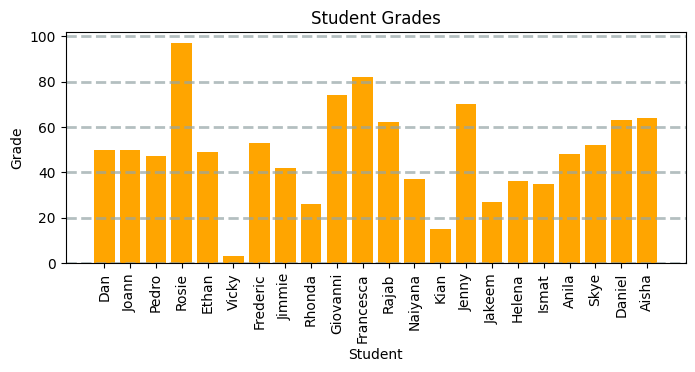

In [25]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

A figure can contain multiple subplots, each on its own *axis*.

For example, the following code creates a figure with two subplots - one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

C:\Users\morte\AppData\Local\Temp\ipykernel_44868\2786848323.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\morte\AppData\Local\Temp\ipykernel_44868\2786848323.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


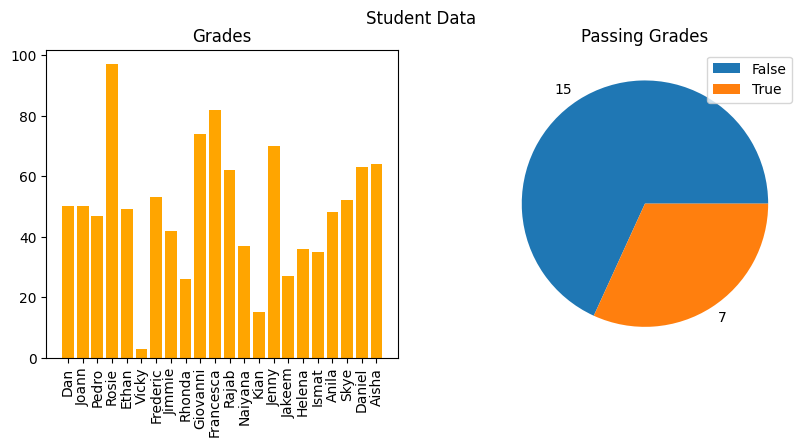

In [26]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

Until now, you've used methods of the Matplotlib.pyplot object to plot charts. However, Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data, as shown in the following example to plot a bar chart of study hours.

<Axes: xlabel='Name'>

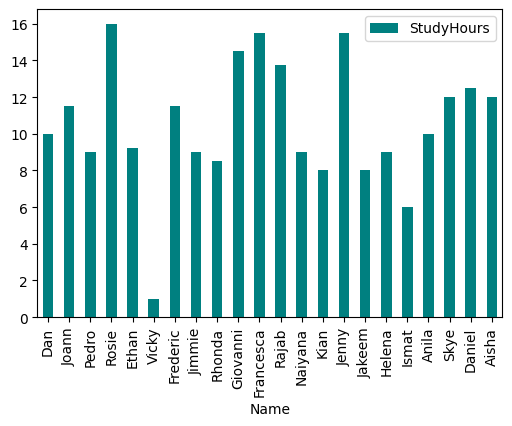

In [27]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Part 3 - Getting started with statistical analysis


### Descriptive statistics and data distribution

When examining a *variable* (for example a sample of student grades), data scientists are particularly interested in its *distribution* (in other words, how are all the different grade values spread across the sample). The starting point for this exploration is often to visualize the data as a histogram, and see how frequently each value for the variable occurs.






C:\Users\morte\AppData\Local\Temp\ipykernel_44868\4182697007.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


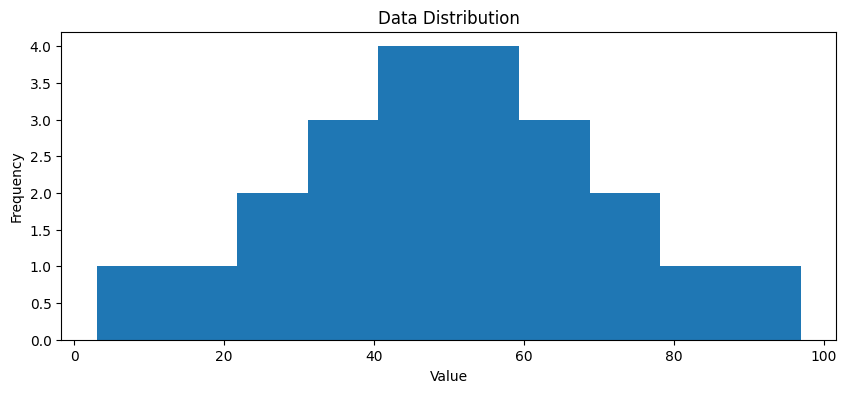

In [28]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

The histogram for grades is a symmetric shape, where the most frequently occurring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

#### Measures of central tendency

To understand the distribution better, we can examine so-called *measures of central tendency*; which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this is to try to find a "typical" value. Common ways to define the middle of the data include:

- The *mean*: A simple average based on adding together all of the values in the sample set, and then dividing the total by the number of samples.
- The *median*: The value in the middle of the range of all of the sample values.
- The *mode*: The most commonly occuring value in the sample set<sup>\*</sup>.

Let's calculate these values, along with the minimum and maximum values for comparison, and show them on the histogram.

> <sup>\*</sup>Of course, in some sample sets , there may be a tie for the most common value - in which case the dataset is described as *bimodal* or even *multimodal*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\morte\AppData\Local\Temp\ipykernel_44868\2664441753.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


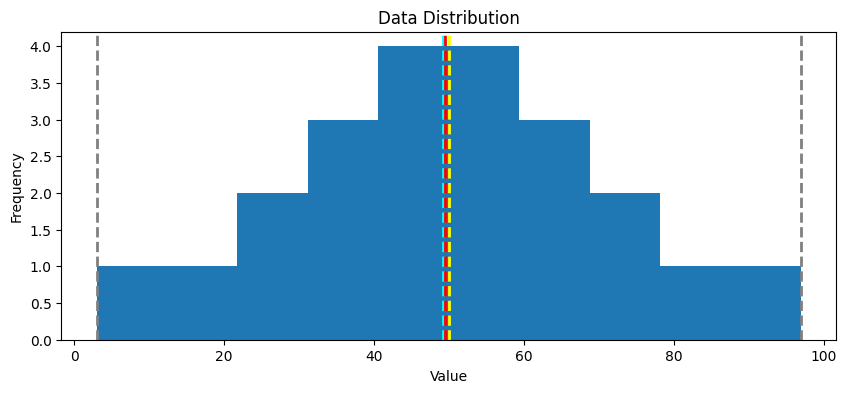

In [29]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

For the grade data, the mean, median, and mode all seem to be more or less in the middle of the minimum and maximum, at around 50.

Another way to visualize the distribution of a variable is to use a *box* plot (sometimes called a *box-and-whiskers* plot). Let's create one for the grade data.

C:\Users\morte\AppData\Local\Temp\ipykernel_44868\4088679524.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


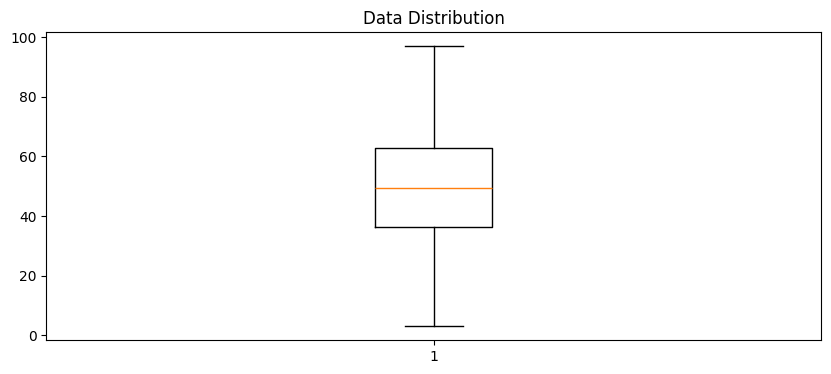

In [30]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\morte\AppData\Local\Temp\ipykernel_44868\1918122812.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


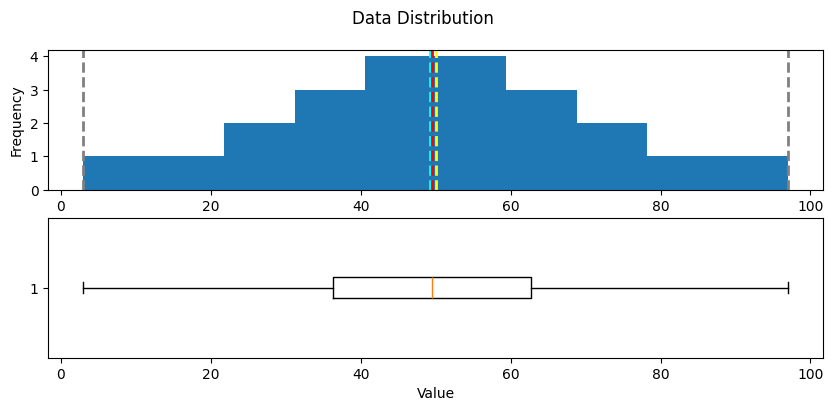

In [31]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

The box plot shows the distribution of the grade values in a different format to the histogram. The *box* part of the plot shows where the inner two *quartiles* of the data reside - so in this case, half of the grades are between approximately 36 and 63. The *whiskers* extending from the box show the outer two quartiles; so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the *median* value.



All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking *samples* of data and using probability functions to extrapolate information about the full *population* of data. For example, the student data consists of 22 samples, and for each sample there is a grade value. You can think of each sample grade as a variable that's been randomly selected from the set of all grades awarded for this course. With enough of these random variables, you can calculate something called a *probability density function*, which estimates the distribution of grades for the full population.

The Pandas DataFrame class provides a helpful plot function to show this density.

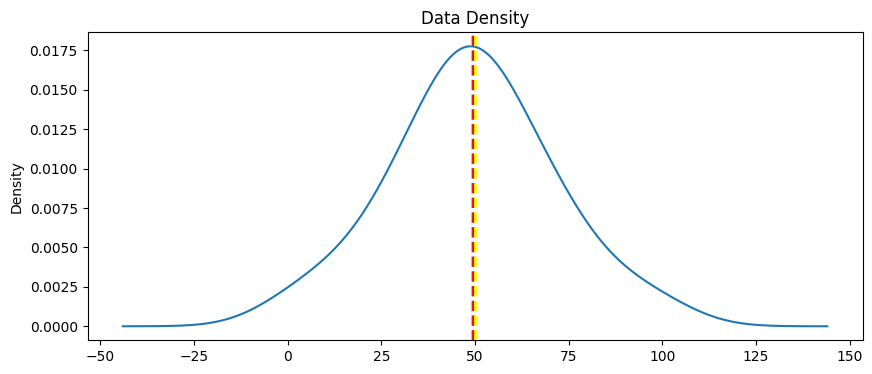

In [32]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only extend to around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an **o**, indicating that it is statistically an *outlier* - a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\morte\AppData\Local\Temp\ipykernel_44868\1918122812.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


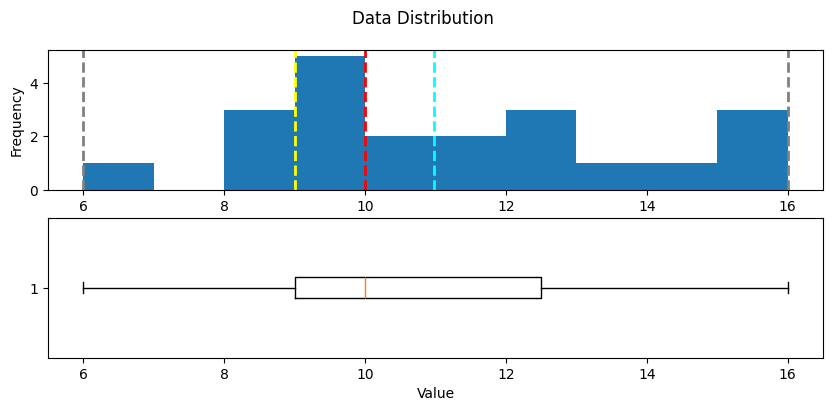

In [33]:
# Get the variable to examine
col = df_students[df_students.StudyHours>1]['StudyHours']
# Call the function
show_distribution(col)

In this example, the dataset is small enough to clearly see that the value **1** is an outlier for the **StudyHours** column, so you can exclude it explicitly. In most real-world cases, it's easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas **quantile** function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\morte\AppData\Local\Temp\ipykernel_44868\1918122812.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


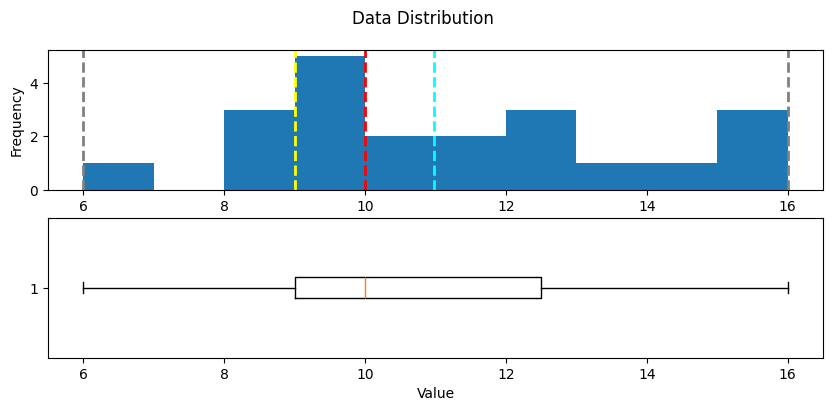

In [34]:
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

> **Tip**: You can also eliminate outliers at the upper end of the distribution by defining a threshold at a high percentile value - for example, you could use the **quantile** function to find the 0.99 percentile below which 99% of the data reside.

With the outliers removed, the box plot shows all data within the four quartiles. Note that the distribution is not symmetric like it is for the grade data though - there are some students with very high study times of around 16 hours, but the bulk of the data is between 7 and 13 hours; The few extremely high values pull the mean towards the higher end of the scale.

Let's look at the density for this distribution.

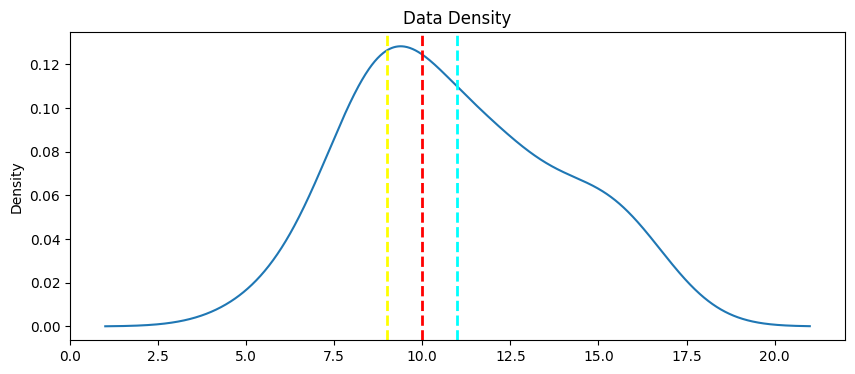

In [35]:
# Get the density of StudyHours
show_density(col)

This kind of distribution is called *right skewed*. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end; which pull the mean to the right.

#### Measures of variance

So now we have a good idea where the middle of the grade and study hours data distributions are. However, there's another aspect of the distributions we should examine: how much variability is there in the data?

Typical statistics that measure variability in the data include:

- **Range**: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the **min** and **max** functions.
- **Variance**: The average of the squared difference from the mean. You can use the built-in **var** function to find this.
- **Standard Deviation**: The square root of the variance. You can use the built-in **std** function to find this.

In [36]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Of these statistics, the standard deviation is generally the most useful. It provides a measure of variance in the data on the same scale as the data itself (so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean - in other words, the data is more spread out.



The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:
- Approximately 68.26% of values fall within one standard deviation from the mean.
- Approximately 95.45% of values fall within two standard deviations from the mean.
- Approximately 99.73% of values fall within three standard deviations from the mean.

So, since we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal; we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.

The descriptive statistics we've used to understand the distribution of the student data variables are the basis of statistical analysis; and because they're such an important part of exploring your data, there's a built-in **Describe** method of the DataFrame object that returns the main descriptive statistics for all numeric columns.

In [37]:
df_students.describe()

StudyHours      Grade
count   22.000000  22.000000
mean    10.522727  49.181818
std      3.487144  21.737912
min      1.000000   3.000000
25%      9.000000  36.250000
50%     10.000000  49.500000
75%     12.375000  62.750000
max     16.000000  97.000000

## Comparing data

Now that you know something about the statistical distribution of the data in your dataset, you're ready to examine your data to identify any apparent relationships between variables.

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [38]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True

### Comparing numeric and categorical variables

The data includes two *numeric* variables (**StudyHours** and **Grade**) and two *categorical* variables (**Name** and **Pass**). Let's start by comparing the numeric **StudyHours** column to the categorical **Pass** column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

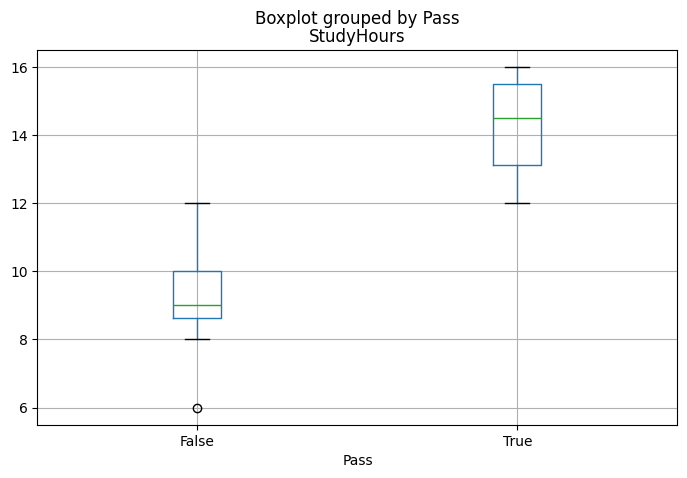

In [39]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

Comparing the StudyHours distributions, it's immediately apparent (if not particularly surprising) that students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive feature.

### Comparing numeric variables

Now let's compare two numeric variables. We'll start by creating a bar chart that shows both grade and study hours.

<Axes: xlabel='Name'>

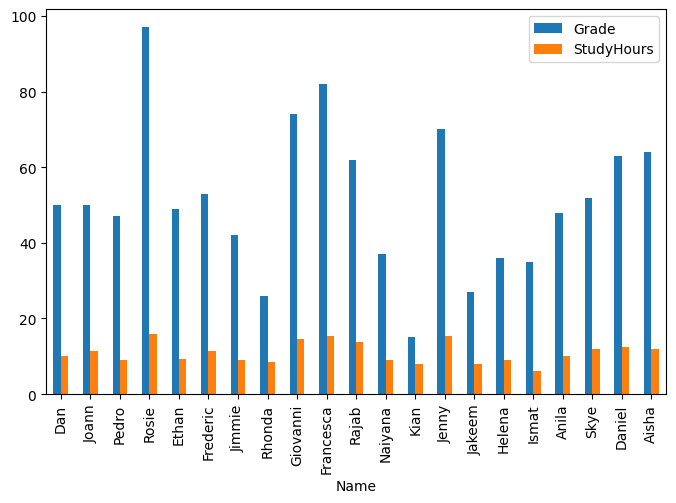

In [40]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student; but it's not easy to compare because the values are on different scales. Grades are measured in grade points, and range from 3 to 97; while study time is measured in hours and ranges from 1 to 16.

A common technique when dealing with numeric data in different scales is to *normalize* the data so that the values retain their proportional distribution, but are measured on the same scale. To accomplish this, we'll use a technique called *MinMax* scaling that distributes the values proportionally on a scale of 0 to 1. You could write the code to apply this transformation; but the **Scikit-Learn** library provides a scaler to do it for you.


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='Name'>

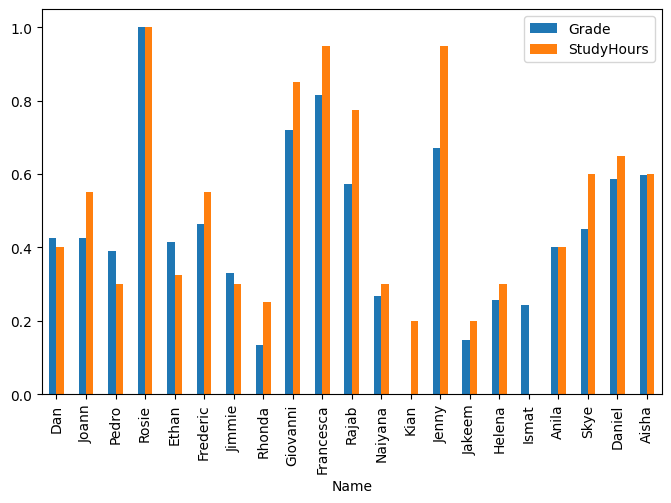

In [41]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.

So there seems to be a correlation between study time and grade; and in fact, there's a statistical *correlation* measurement we can use to quantify the relationship between these columns.

In [42]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677


Another way to visualise the apparent correlation between two numeric columns is to use a *scatter* plot.

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

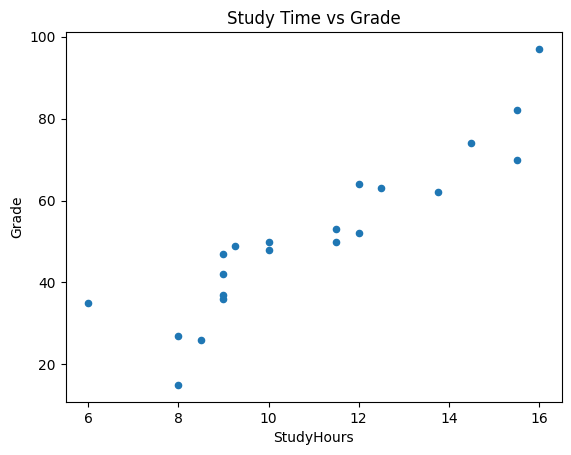

In [43]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

Again, it looks like there's a discernible pattern in which the students who studied the most hours are also the students who got the highest grades.



So by applying statistics to sample data, you've determined a relationship between study time and grade; and encapsulated that relationship in a general function that can be used to predict a grade for a given amount of study time.

This technique is in fact the basic premise of machine learning. You can take a set of sample data that includes one or more *features* (in this case, the number of hours studied) and a known *label* value (in this case, the grade achieved) and use the sample data to derive a function that calculates predicted label values for any given set of features.

## Further Reading

To learn more about the Python packages you explored in this notebook, see the following documentation:

- [NumPy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)

